This notebook is for experimenting with the affects of augmenting the training data.

In [1]:
#imports 
import os, shutil
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from tensorflow.keras import regularizers
import seaborn as sns
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

In [2]:
# # strings of directories for the different data
# train_images_dir = 'C:/Users/User/Desktop/hand_images/train'
# test_images_dir = 'C:/Users/User/Desktop/hand_images/test'

In [3]:
# strings of directories for the different data
train_images_dir = 'C:/Users/User/Documents/Flatiron/Capstone/train_data_guns'
test_images_dir = 'C:/Users/User/Documents/Flatiron/Capstone/test_data_guns'

In [4]:
# here I set 3 global variables: target size, batch size and epochs
# I do this because these variables are used quite often, so I wanted to be able to change it one place 
# and have it change everywhere in the rest of the notebook.
global_target_size = (127,127) # The size of the images
global_batch_size = 32 # The size of each batch being fed to the models
global_epochs = 150 # How many times each model should run through the entire dataset

In [5]:
train_val_generator = ImageDataGenerator(rescale=1./255,
                                         validation_split = .25,
                                        horizontal_flip = True,
                                    zoom_range = .05,
                                         brightness_range=(.75,1))

In [6]:
train_data = train_val_generator.flow_from_directory(train_images_dir,  
                                                     target_size = global_target_size,
                                                     subset='training',
                                                     batch_size=global_batch_size,
                                                     class_mode='binary',
                                                    shuffle = True,
                                                    seed = 42)

Found 974 images belonging to 2 classes.


In [7]:
val_generator_aug = ImageDataGenerator(rescale=1./255,
                                         validation_split = .25)

In [8]:
val_data = val_generator_aug.flow_from_directory(train_images_dir,  
                                                     target_size = global_target_size,
                                                     subset='validation',
                                                     batch_size=global_batch_size,
                                                     class_mode='binary',
                                                    shuffle = True,
                                                    seed = 42)

Found 323 images belonging to 2 classes.


In [9]:
model18 = models.Sequential()

# Stack 1
model18.add(layers.Conv2D(filters = 64,
                         kernel_size=(3,3),
                         activation='relu',
                         input_shape = (global_target_size[0],global_target_size[0], 3),
                         padding = 'same'
                        ))
model18.add(layers.MaxPooling2D(pool_size = (4,4),
                         padding = 'same'))

# Dropout Layer 1
model18.add(layers.Dropout(0.1))

# Stack 2
model18.add(layers.Conv2D(32, (3,3), activation='relu',padding = 'same'))
model18.add(layers.MaxPooling2D((2, 2),
                         padding = 'same'))

# Dropout Layer 2
model18.add(layers.Dropout(0.1))

# Stack 3
model18.add(layers.Conv2D(64, (4,4), activation='relu'))
model18.add(layers.MaxPooling2D((2, 2),
                         padding = 'same'))

# Stack 4
model18.add(layers.Conv2D(128, (3,3), activation='relu',padding='same'))
model18.add(layers.MaxPooling2D((2, 2),
                                padding = 'same'))

# Dropout Layer 3
model18.add(layers.Dropout(0.1))

# Stack 5
model18.add(layers.Conv2D(128, (4,4), activation='relu',padding = 'same'))
model18.add(layers.MaxPooling2D((2, 2),
                         padding = 'same'))

# Dropout Layer 4
model18.add(layers.Dropout(0.1))

# Stack 5
model18.add(layers.Conv2D(256, (4,4), activation='relu',padding = 'same'))
model18.add(layers.MaxPooling2D((2, 2),
                         padding = 'same'))

# Flattening layer
model18.add(layers.Flatten())

# Dense layer 1
model18.add(layers.Dense(64, activation='relu'))

# Dense layer 2 - output layer
model18.add(layers.Dense(1, activation='sigmoid'))

model18.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['acc'])

In [10]:
model18_history = model18.fit(train_data,
                    epochs=global_epochs,
                    validation_data = val_data
                   )

Epoch 1/150
31/31 [==============================] - 96s 3s/step - loss: 0.6943 - acc: 0.4887 - val_loss: 0.6921 - val_acc: 0.5232
Epoch 2/150
31/31 [==============================] - 105s 3s/step - loss: 0.6936 - acc: 0.5226 - val_loss: 0.6924 - val_acc: 0.5232
Epoch 3/150
31/31 [==============================] - 88s 3s/step - loss: 0.6926 - acc: 0.5226 - val_loss: 0.6922 - val_acc: 0.5232
Epoch 4/150
31/31 [==============================] - 82s 3s/step - loss: 0.6919 - acc: 0.5226 - val_loss: 0.6881 - val_acc: 0.5232
Epoch 5/150
31/31 [==============================] - 82s 3s/step - loss: 0.6645 - acc: 0.5945 - val_loss: 0.5178 - val_acc: 0.8235
Epoch 6/150
31/31 [==============================] - 82s 3s/step - loss: 0.5958 - acc: 0.6951 - val_loss: 0.5431 - val_acc: 0.7833
Epoch 7/150
31/31 [==============================] - 82s 3s/step - loss: 0.5526 - acc: 0.7269 - val_loss: 0.4745 - val_acc: 0.8080
Epoch 8/150
31/31 [==============================] - 79s 3s/step - loss: 0.5021 - 

Epoch 125/150
31/31 [==============================] - 63s 2s/step - loss: 0.0094 - acc: 0.9959 - val_loss: 1.1983 - val_acc: 0.7833
Epoch 126/150
31/31 [==============================] - 61s 2s/step - loss: 0.0124 - acc: 0.9949 - val_loss: 1.3769 - val_acc: 0.7895
Epoch 127/150
31/31 [==============================] - 63s 2s/step - loss: 0.0329 - acc: 0.9897 - val_loss: 1.1235 - val_acc: 0.7802
Epoch 128/150
31/31 [==============================] - 75s 2s/step - loss: 0.0224 - acc: 0.9928 - val_loss: 1.1966 - val_acc: 0.7864
Epoch 129/150
31/31 [==============================] - 72s 2s/step - loss: 0.0276 - acc: 0.9897 - val_loss: 1.1300 - val_acc: 0.7957
Epoch 130/150
31/31 [==============================] - 73s 2s/step - loss: 0.0111 - acc: 0.9959 - val_loss: 1.3944 - val_acc: 0.7771
Epoch 131/150
31/31 [==============================] - 53s 2s/step - loss: 0.0212 - acc: 0.9908 - val_loss: 0.9597 - val_acc: 0.7988
Epoch 132/150
31/31 [==============================] - 52s 2s/step - 

In [11]:
model18.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 127, 127, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        3

In [12]:
model_18_train_results = model18.evaluate(train_data)
model_18_train_results

model_18_val_results = model18.evaluate(val_data)
model_18_val_results

11/11 [==============================] - 6s 566ms/step - loss: 0.9986 - acc: 0.8019


[0.9986042380332947, 0.801857590675354]

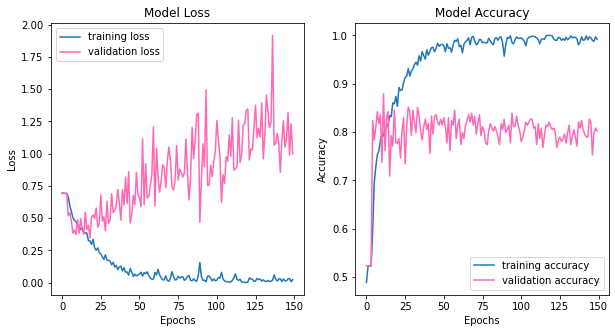

In [13]:
# visualizing loss and accuracy per epoch
model18_train_loss = model18_history.history['loss']
model18_train_acc = model18_history.history['acc']
model18_val_loss = model18_history.history['val_loss']
model18_val_acc = model18_history.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(x=model18_history.epoch, y=model18_train_loss, ax=ax1, label='training loss')
sns.lineplot(x=model18_history.epoch, y=model18_train_acc, ax=ax2, label='training accuracy')

sns.lineplot(x=model18_history.epoch, y=model18_val_loss, ax=ax1, label='validation loss',color = 'hotpink')
sns.lineplot(x=model18_history.epoch, y=model18_val_acc, ax=ax2, label='validation accuracy',color = 'hotpink')

ax1.set(xlabel = 'Epochs')
ax2.set(xlabel = 'Epochs')

ax1.set(ylabel = 'Loss')
ax2.set(ylabel = 'Accuracy')

ax1.set(title='Model Loss')
ax2.set(title='Model Accuracy')

fig.savefig("../Visuals/final_model_accuracy",bbox_inches='tight',transparent = True);

# Testing Data

In [14]:
test_generator = ImageDataGenerator(rescale=1./255)

In [15]:
test_data = test_generator.flow_from_directory(test_images_dir,  
                                                     target_size = global_target_size,
                                                     batch_size=global_batch_size,
                                                     class_mode='binary',
                                                    shuffle = False,
                                                    seed = 42)

Found 237 images belonging to 2 classes.


In [16]:
test_score =  model18.evaluate(test_data)
test_score

8/8 [==============================] - 8s 1s/step - loss: 1.6629 - acc: 0.7890


[1.6629409790039062, 0.7890295386314392]

In [17]:
model_18_predictions = model18.predict(test_data)

In [18]:
# getting predictions from sigmoid probabilities
predictions = [] 
for value in model_18_predictions:
    if value > .25:
        predictions.append(1)
    else:
        predictions.append(0)
    
print(predictions)
# labels
labels = test_data.labels
print(labels)

[1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

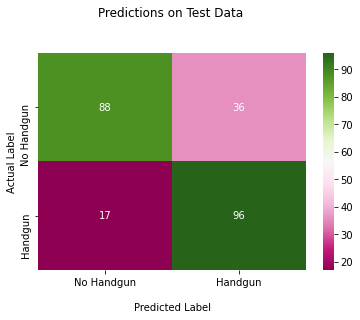

<Figure size 432x288 with 0 Axes>

In [24]:
# creating confusion matrix
import matplotlib.pyplot as plt2
import seaborn as sns
matrix = confusion_matrix(labels, predictions)
ax_conf = sns.heatmap(matrix, annot=True, cmap='PiYG')

ax_conf.set_title('Predictions on Test Data \n\n');
ax_conf.set_xlabel('\nPredicted Label')
ax_conf.set_ylabel('Actual Label');

## Ticket labels - List must be in alphabetical order
ax_conf.xaxis.set_ticklabels(['No Handgun','Handgun'])
ax_conf.yaxis.set_ticklabels(['No Handgun','Handgun'])

# ## Display the visualization of the Confusion Matrix.
plt2.show();
plt2.savefig("../Visuals/confusion_matrix",bbox_inches='tight',transparent = True);



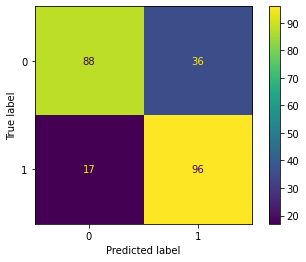

In [19]:
# creating confusion matrix
matrix = confusion_matrix(labels, predictions)
conf_matrix = ConfusionMatrixDisplay(matrix)
conf_matrix.plot();

In [20]:
test_data_viz = test_generator.flow_from_directory(test_images_dir,  
                                                     target_size = global_target_size,
                                                     batch_size=239,
                                                     class_mode='binary',
                                                    shuffle = False,
                                                    seed = 42)

Found 237 images belonging to 2 classes.


In [21]:
# incorrects = np.nonzero(predictions != labels)

In [22]:
# incorrects

(array([  0,   3,   4,   5,   6,   7,   9,  10,  11,  12,  13,  15,  31,
         43,  59,  63,  66,  72,  73,  80,  84,  85,  86,  87,  88,  89,
         90,  92,  93,  94,  95, 103, 105, 106, 107, 113, 136, 152, 175,
        178, 179, 182, 183, 186, 189, 190, 193, 197, 199, 203, 204, 205,
        224], dtype=int64),)

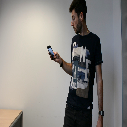

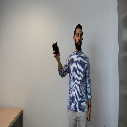

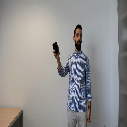

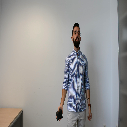

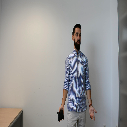

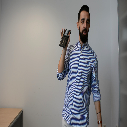

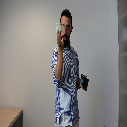

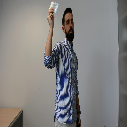

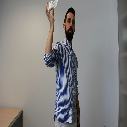

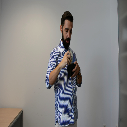

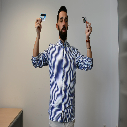

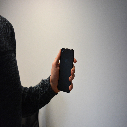

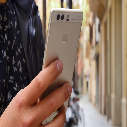

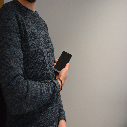

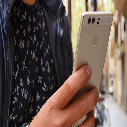

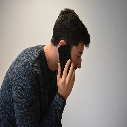

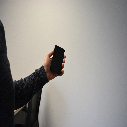

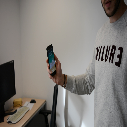

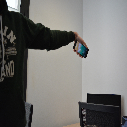

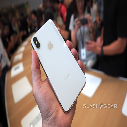

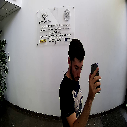

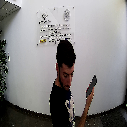

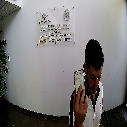

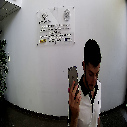

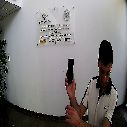

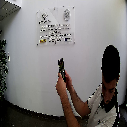

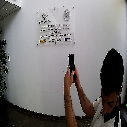

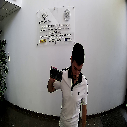

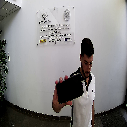

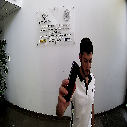

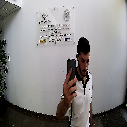

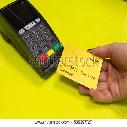

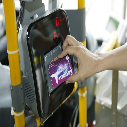

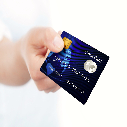

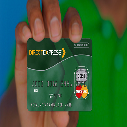

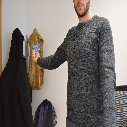

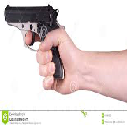

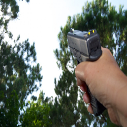

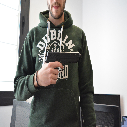

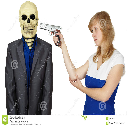

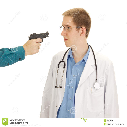

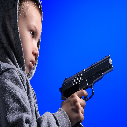

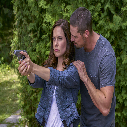

KeyboardInterrupt: 

In [23]:
# for index in incorrects[0]:
#     display(array_to_img(test_data_viz[0][0][index]))

In [ ]:
# corrects = np.nonzero(predictions == labels)

In [ ]:
# corrects

In [ ]:
# for index in corrects[0]:
#     display(array_to_img(test_data_viz[0][0][index]))